# Equipo #10



- Grupo 003, Viernes 6-9

1803561 López Peña Marcelo Adrián

1809399 Villarreal Martínez Estibalyz

1863305 Zuñiga Cedillo Milton Humberto

# Students Performance in Exams

- En esta base de datos se recopila información acerca del desempeño de alumnos en sus distintos exámenes, tomando en consideración diferentes datos que puedan afectar el rendimiento estos siendo su género, su etnicidad, el nivel de educación de los padres, su almuerzo, y su preparación antes del examen

## Manipulación de datos

Lectura de la base de datos

In [2]:
df_excel = pd.read_excel('C:/Users/Usuario/Desktop/FCFM/5 semestre/Mineria de datos/StudentsPerformance.xlsx')

Se muestran los elementos de la base de dantos antes de que sean manipulados

In [3]:
print('Base de datos sin modificar')
print("(filas, columnas) =", df_excel.shape)
print(df_excel.dtypes)
df_excel.head()

Base de datos sin modificar
(filas, columnas) = (1000, 8)
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Se verifican si las columnas tienen datos nulos

In [4]:
df_excel.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

Como ninguna columna contiene datos nulos se conserva la base de datos

Se modifica la base de datos

In [58]:
df_mod.gender.replace(to_replace = dict('female' = 1, 'male' = 0), inplace = True)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-58-61eff50edf6b>, line 1)

Aqui intentamos cambiar la columna de genero por 0 y 1

In [5]:
df_mod = df_excel.drop('race/ethnicity',axis = 1 )  #Se elimina la columna 'race/ethnicity'
print(df_mod.dtypes)

gender                         object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


Se imprime la base de datos modificada

In [6]:
print('Base de datos modificada:')
df_mod.head()

Base de datos modificada:


,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,standard,none,72,72,74
1,female,some college,standard,completed,69,90,88
2,female,master's degree,standard,none,90,95,93
3,male,associate's degree,free/reduced,none,47,57,44
4,male,some college,standard,none,76,78,75


Se opto por eliminar la columna 'race/ethnicity' debido a que la propia página decide mantener el significado de cada letra oculto, por lo que nosotros optamos por descartarla ya que no queremos informacion que no sea entendible

In [10]:
import pandas as pd

Se importo la libreria pandas porque la utilizaremos mas adelante

In [17]:
print('\t Matematicas')
print('Promedio: ', df_mod['math score'].mean())
print('Minimo: ', df_mod['math score'].min())
print('Maximo: ', df_mod['math score'].max())

	 Matematicas
Promedio:  66.089
Minimo:  0
Maximo:  100


In [18]:
print('\t Lectura')
print('Promedio: ', df_mod['reading score'].mean())
print('Minimo: ', df_mod['reading score'].min())
print('Maximo: ', df_mod['reading score'].max())

	 Lectura
Promedio:  69.169
Minimo:  17
Maximo:  100


In [19]:
print('\t Escritura')
print('Promedio: ', df_mod['writing score'].mean())
print('Minimo: ', df_mod['writing score'].min())
print('Maximo: ', df_mod['writing score'].max())

	 Escritura
Promedio:  68.054
Minimo:  10
Maximo:  100


Utilizamos el promedio, minimo y maximo de cada asignatura para darnos una idea de que rango de datos encontraremos en cada una de ellas, donde podemos aprecir que el peor promedio es en matematicas, seguido de escritura mientras el mas alto es lectura tambien se observa como matematicas es la unica asignatura con un minimo de cero

## Visualización de datos

In [23]:
import matplotlib as plt

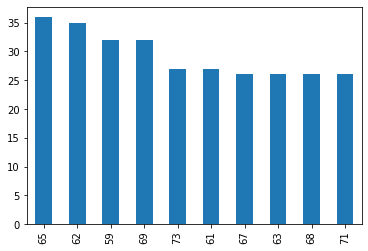

In [39]:
df_mod['math score'].value_counts().head(10).plot.bar()

podemos observar que la mayoria de las calificaciones en matematicas son reprobatorias

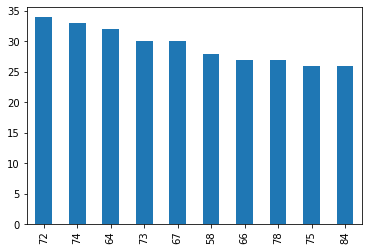

In [40]:
df_mod['reading score'].value_counts().head(10).plot.bar()

Las calificaciones estan un poco mas distribuidas que en las demas asignaciones.

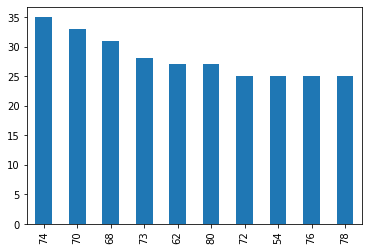

In [44]:
df_mod['writing score'].value_counts().head(10).plot.bar()

La mayoria de las calificaciones son aprobatorias, esto puede significar que quiza la asignación de writing se podría considerar mas facil en la mayoria de los alumnos.

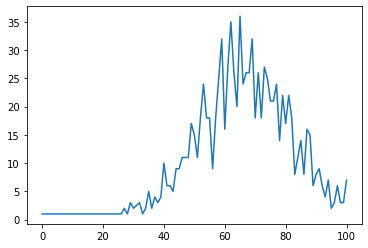

In [50]:
df_mod['math score'].value_counts().sort_index().plot.line()

La mayoria de las calificaciones estan entre 60 y 70, pero teniendo un gran numero de personas que reprobaron la materia alrededor de los 50-69 pts y vemos como conforme aumenta la calificacion disminuyen las personas.

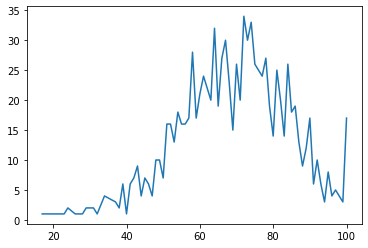

In [51]:
df_mod['reading score'].value_counts().sort_index().plot.line()

La mayoria de las calificaciones estan entre 60 y 80, esta mas disperso en cuanto a matematicas, pero aun asi tenemos concentraciones muy grandes en ambos extremos.

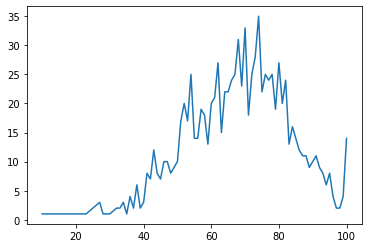

In [52]:
df_mod['writing score'].value_counts().sort_index().plot.line()

La mayoria de las calificaciones estan entre 60 y 80, pero podemos observas que un numero mas amplio de personas lograron aprobar esta materia.

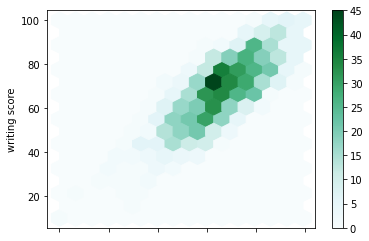

In [71]:
df_mod[df_mod['math score'] < 100].plot.hexbin(x='math score', y='writing score', gridsize = 15)

La concentracion de personas se encuentra en los 70 puntos.

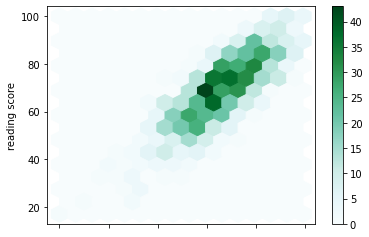

In [72]:
df_mod[df_mod['math score'] < 100].plot.hexbin(x='math score', y='reading score',  gridsize = 15)

La concentración mayor de calificaciones se encuentra en los 70 puntos.

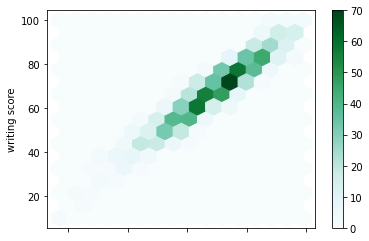

In [73]:
df_mod[df_mod['reading score'] < 100].plot.hexbin(x='reading score', y='writing score',  gridsize = 15)

Hay una menor concentracion de calificaciones pero la mayoria se encuentran en los 70 puntos.

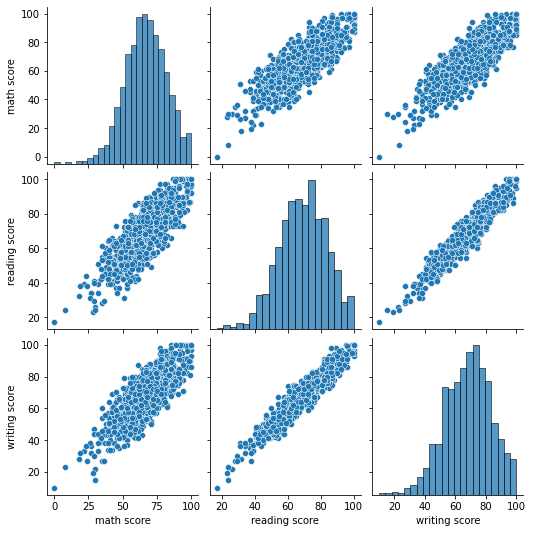

In [91]:
import pandas as pd
import seaborn as sns
import pandas_profiling

sns.pairplot(df_mod[['math score', 'reading score', 'writing score']])

El rendimiento de los estudiantes es un tema que siempre nos ha interesado y poder entender las características que pueden afectar estos resultados para así en un futuro poder mejorar los resultados.

Poder desarrollar mejor nuestra capacidad dentro de la minería de datos, siendo así la recolección de datos para obtener un mejor resultado en el futuro, además de entender a fondo algunas de las razones externas que pueden afectar a la hora de realizar un examen

## Objetivos

### Principal
- Identificar que factores tienen mayor impacto en el rendimiento academico de los alumnos.

### Secundarios
- Predecir el rendimiento academico de un estudiante a partir de los factores a los que se enfrenta dia a dia.

### Conclusion
Con las graficas que obutvimos podemos obesrvar que en el area de matematicas las calificaciones tienden a ser mas bajas, sin embargo en los 3 tipos de examenes podemos apreciar como la mayoria de la concentración de los datos se encuentras en la linea entre aprobar y reprobar, lo que queremos creer que significa que sin importar el tipo de situaciones anteriores o ajenas al examen se presenten la mayoria de los estudiantes tienden a estar en una calificacion de 70 puntos, quedara ver mas pruebas para determinar si existe alguna relacion entre los pocos alumnos que sobresalen hacia cualquier extremo.

Ademas podemos observar que la mayoria de calificaciones se relacionan entre si, es decir muchas personas que obtuvieron calificaciones de 70 en sus examenes de matematicas, obtuvieron casi el mismo resultado en cualquier otra asignación.